In [1]:
import pandas as pd
from glob import glob

import re

### Overview

#### Munich rental market

In [120]:
paths = glob("data/immo24/rent/processed/*")
df_all = pd.concat([pd.read_csv(path) for path in paths])

## remove some fake providers
df_all = df_all[~df_all.company.isin(["Tauschwohnung GmbH", "Wohnungsswap.de - Lägenhetsbyte Sverige AB -"])]

<AxesSubplot:>

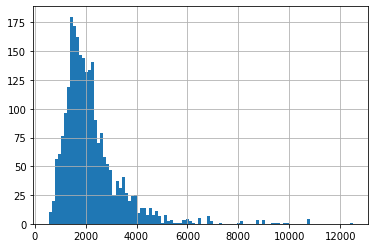

In [121]:
df_all.warm_price.hist(bins=100)

In [122]:
df_all.warm_price.mean(), df_all.warm_price.median()

(2213.5922130470685, 1937.6399999999999)

<AxesSubplot:>

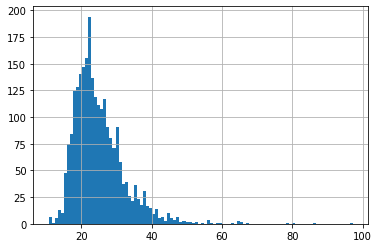

In [123]:
df_all.price_per_m2.hist(bins=100)

In [124]:
df_all.price_per_m2.mean(), df_all.price_per_m2.median(), df_all.price_per_m2.std()

(25.08167274200081, 23.48, 7.564236853113887)

<AxesSubplot:>

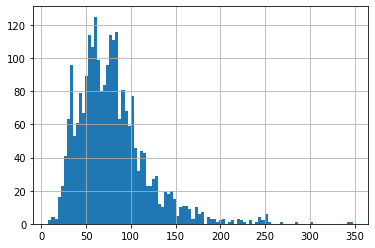

In [125]:
df_all.area.hist(bins=100)

In [126]:
df_all.n_room.value_counts()

2.0    782
3.0    691
1.0    392
4.0    255
2.5    103
3.5     77
1.5     63
5.0     58
4.5     29
6.0     16
7.5      2
9.5      1
7.0      1
Name: n_room, dtype: int64

In [127]:
df_all.company.value_counts()[:10]

private                                             736
Mr. Lodge GmbH                                      188
KW Consult GmbH                                     108
Inseriert auf ohne-makler.net                        63
GWG Städtische Wohnungsgesellschaft München mbH      27
Wohnungs- und Siedlungsbau Bayern GmbH & Co. OHG     26
Dawonia Management GmbH                              24
Aigner Immobilien GmbH                               24
keine Angaben verfügbar                              24
PÖTTINGER WOHN- & INDUSTRIEBAU GMBH & CO. KG         23
Name: company, dtype: int64

In [128]:
def find_postcode(text):
    match = postcode_pattern.search(str(text))
    if match:
        return match.group()
    else:
        return None

In [129]:
df_all["post_code"] = df_all["std_address"].apply(find_postcode)

In [130]:
df_all.post_code.value_counts()[:20]

81379    120
81827     83
81541     81
81245     66
81735     60
81737     59
81479     56
80469     53
81545     52
81249     52
80538     50
80687     46
81543     44
80809     44
81925     44
80804     44
81825     43
80807     42
80634     39
80339     38
Name: post_code, dtype: int64

#### Munich buying market

In [131]:
paths = glob("data/immo24/buy/processed/*")
df_all = pd.concat([pd.read_csv(path) for path in paths])

<AxesSubplot:>

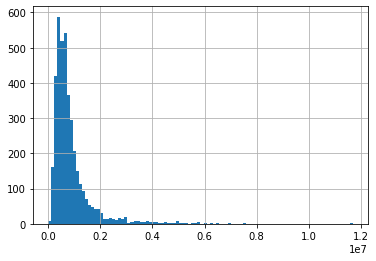

In [132]:
df_all.buy_price.hist(bins=100)

In [133]:
df_all.buy_price.mean(), df_all.buy_price.median()

(866612.3466759141, 650000.0)

<AxesSubplot:>

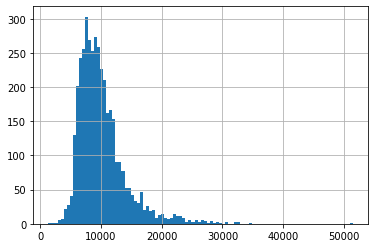

In [134]:
df_all.price_per_m2.hist(bins=100)

In [135]:
df_all.price_per_m2.mean(), df_all.price_per_m2.median(), df_all.price_per_m2.std()

(10095.892052963429, 9261.0, 3998.4845291572105)

<AxesSubplot:>

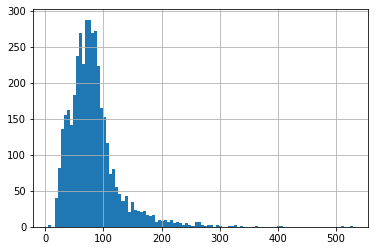

In [136]:
df_all.area.hist(bins=100)

In [137]:
df_all.n_room.value_counts()[:10]

3.0     1319
2.0     1037
4.0      560
1.0      558
2.5      135
5.0      130
3.5      128
1.5       75
4.5       48
6.0       23
7.0       15
8.0        5
5.5        3
10.0       3
Name: n_room, dtype: int64

In [138]:
df_all.company.value_counts()[:10]

SIS-Sparkassen-Immobilien-Service GmbH    139
private                                   137
Aigner Immobilien GmbH                     90
Duken & v. Wangenheim                      88
KWAG Neubau GmbH                           88
PlanetHome Group GmbH                      71
CITIGRUND Immobilien GmbH                  66
Inseriert auf ohne-makler.net              66
Walser Residential GmbH                    65
DEMOS Wohnbau GmbH                         57
Name: company, dtype: int64

In [139]:
df_all["post_code"] = df_all["std_address"].apply(find_postcode)

In [140]:
df_all.post_code.value_counts()[:20]

81827    143
81245    140
81249    133
81925    111
81545    110
81735    105
81927    103
81479    102
81247     99
81379     82
81825     78
81541     77
81241     74
80992     72
80687     72
80636     71
81549     69
80797     68
81369     66
80469     66
Name: post_code, dtype: int64

###  Export rent samples

In [2]:
df = pd.read_csv("data/immo24/rent/processed/data_20240118.csv")
df = df[~df.company.isin(["Tauschwohnung GmbH"])]

In [3]:
mask = (df.price_per_m2<20) & (df.warm_price<=1500) & (df.n_room>=1.5)

In [4]:
df[mask].to_excel("examples.xlsx", index=False)

### Export buy samples

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("data/immo24/buy/processed/data_20240106.csv")

In [5]:
mask = (df.price_per_m2<8000) & (df.buy_price<=500_000) & (df.n_room>=1.5)

In [7]:
df[mask].to_excel("buy_examples.xlsx", index=False)